In [1]:
# Doing the necessary imports
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


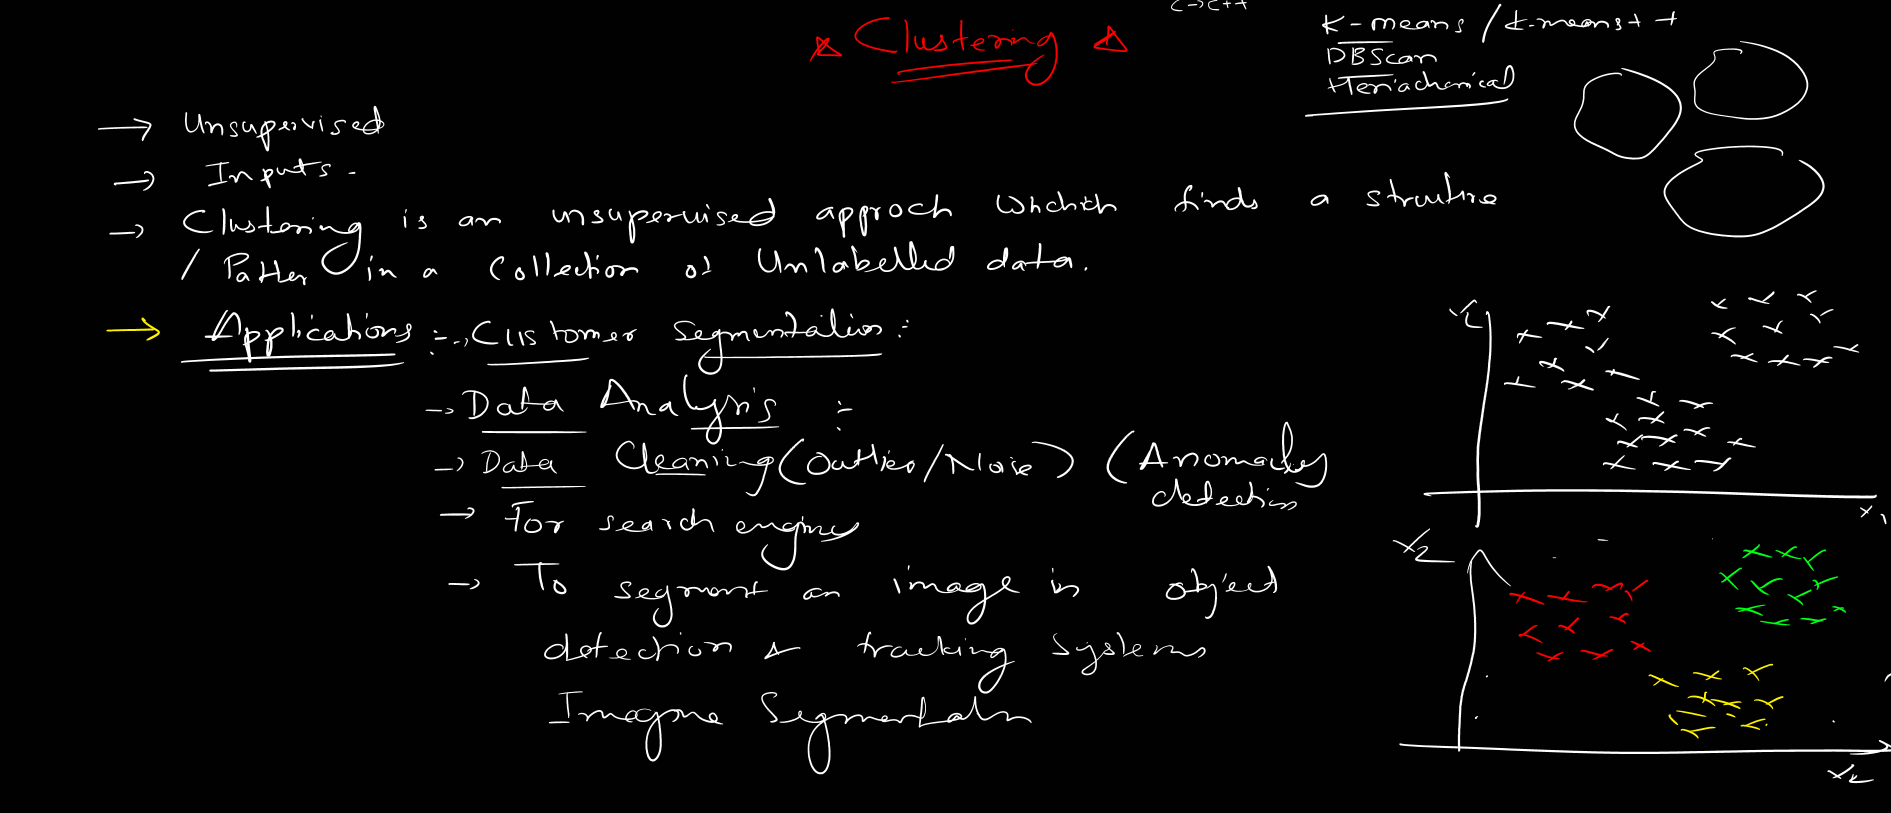

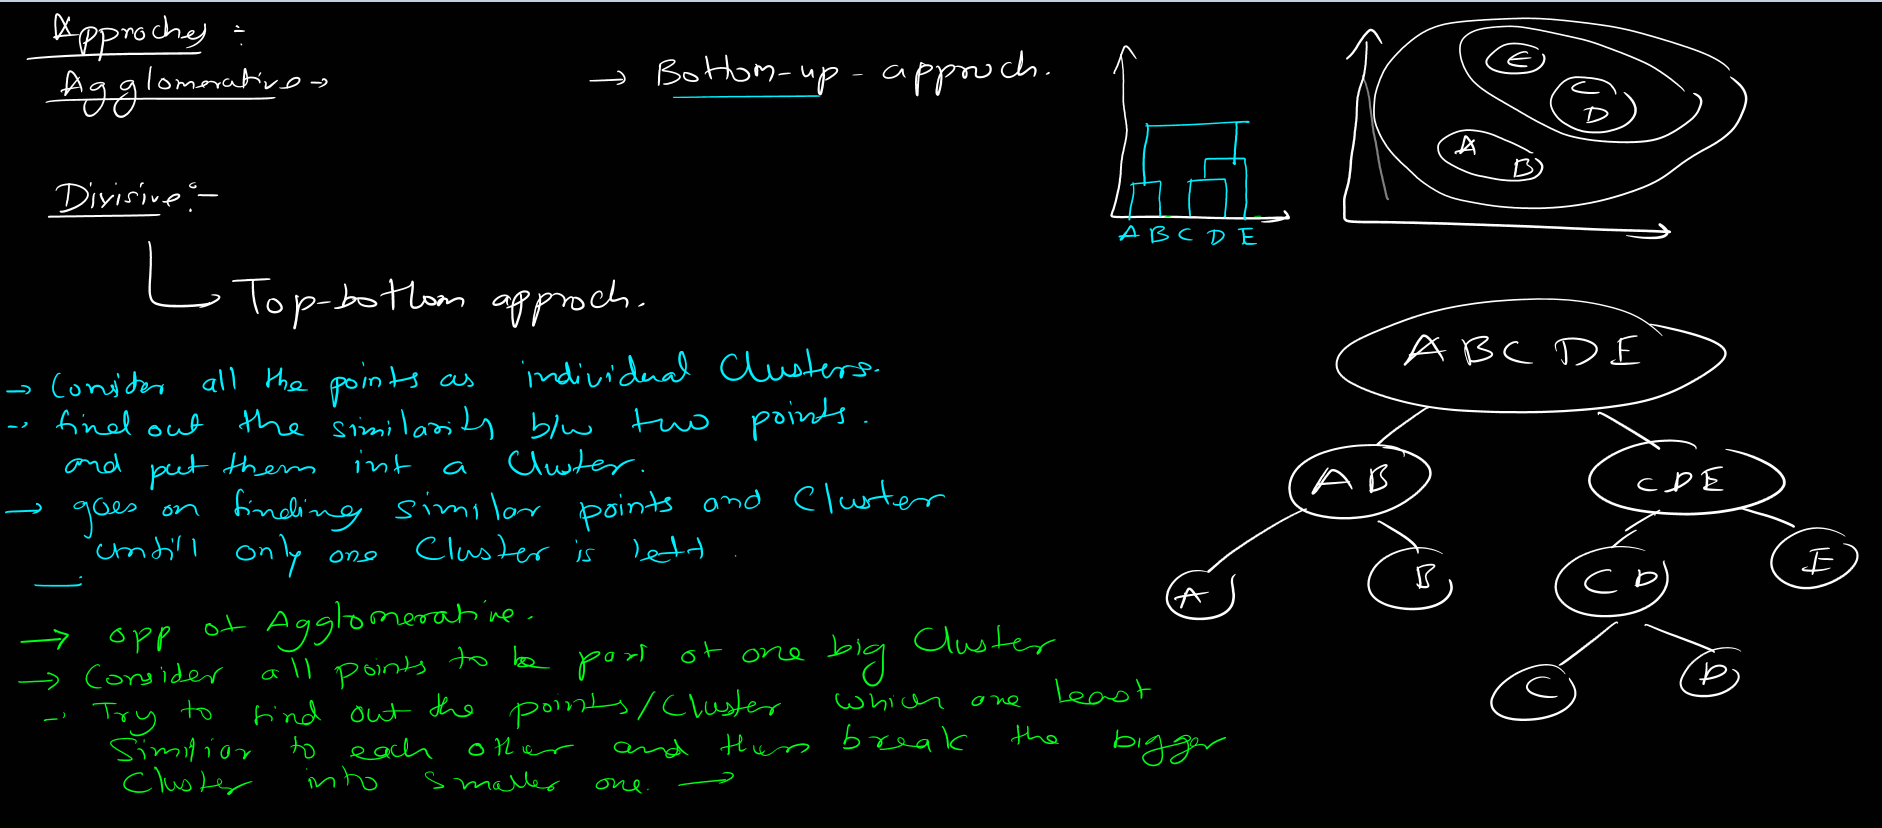

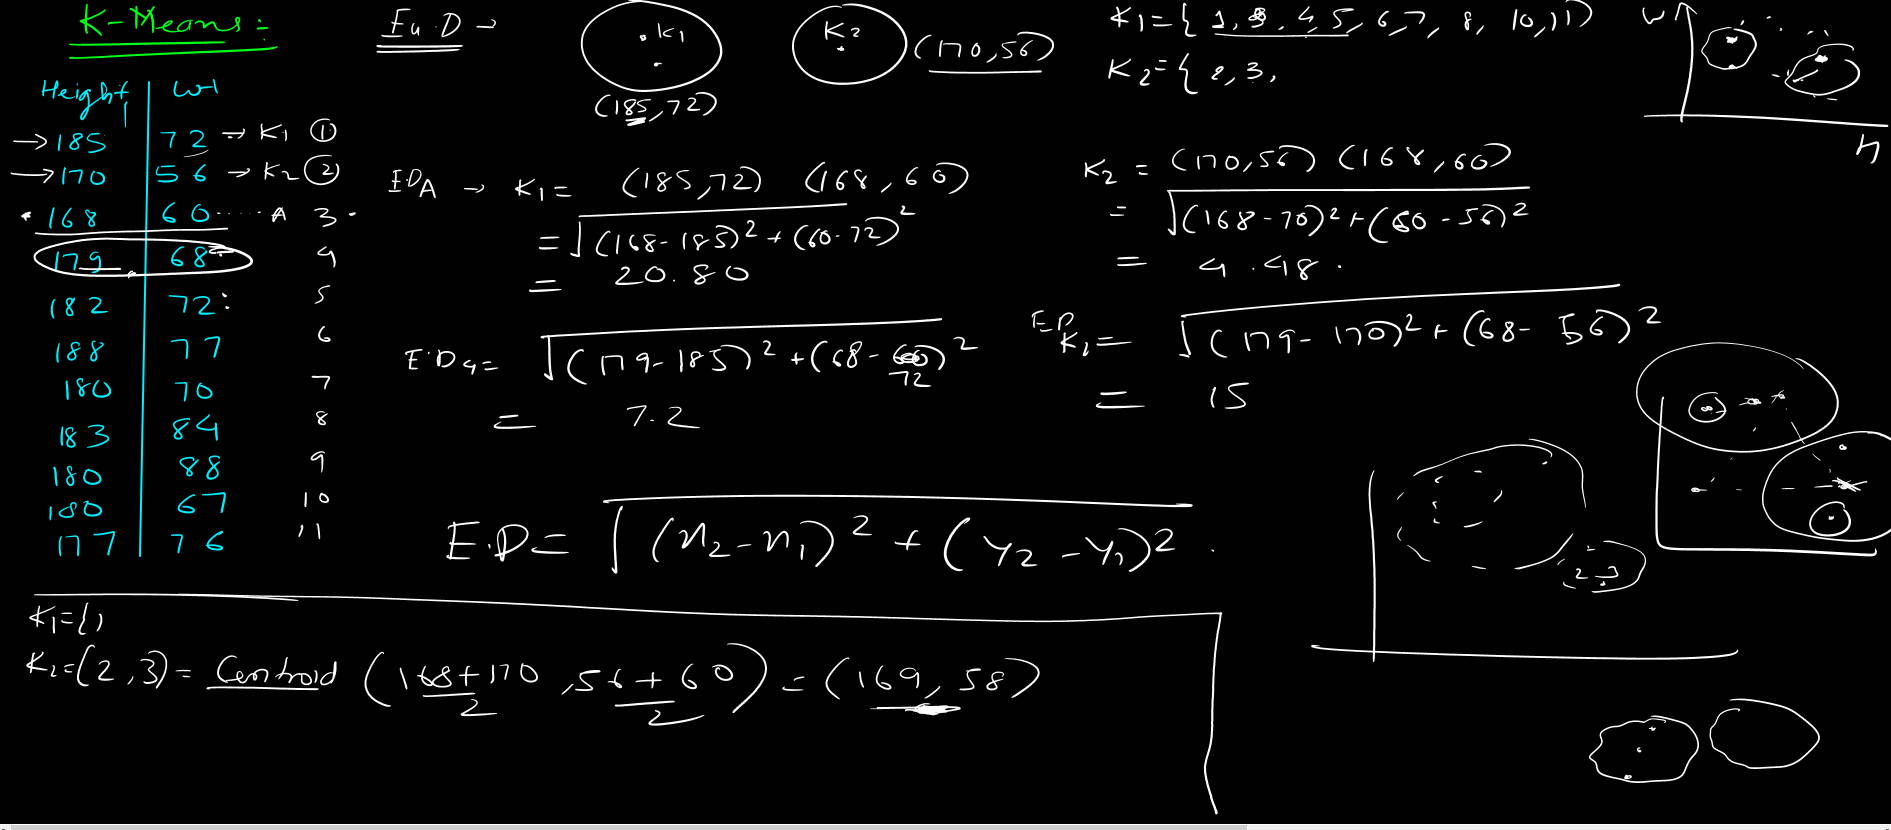

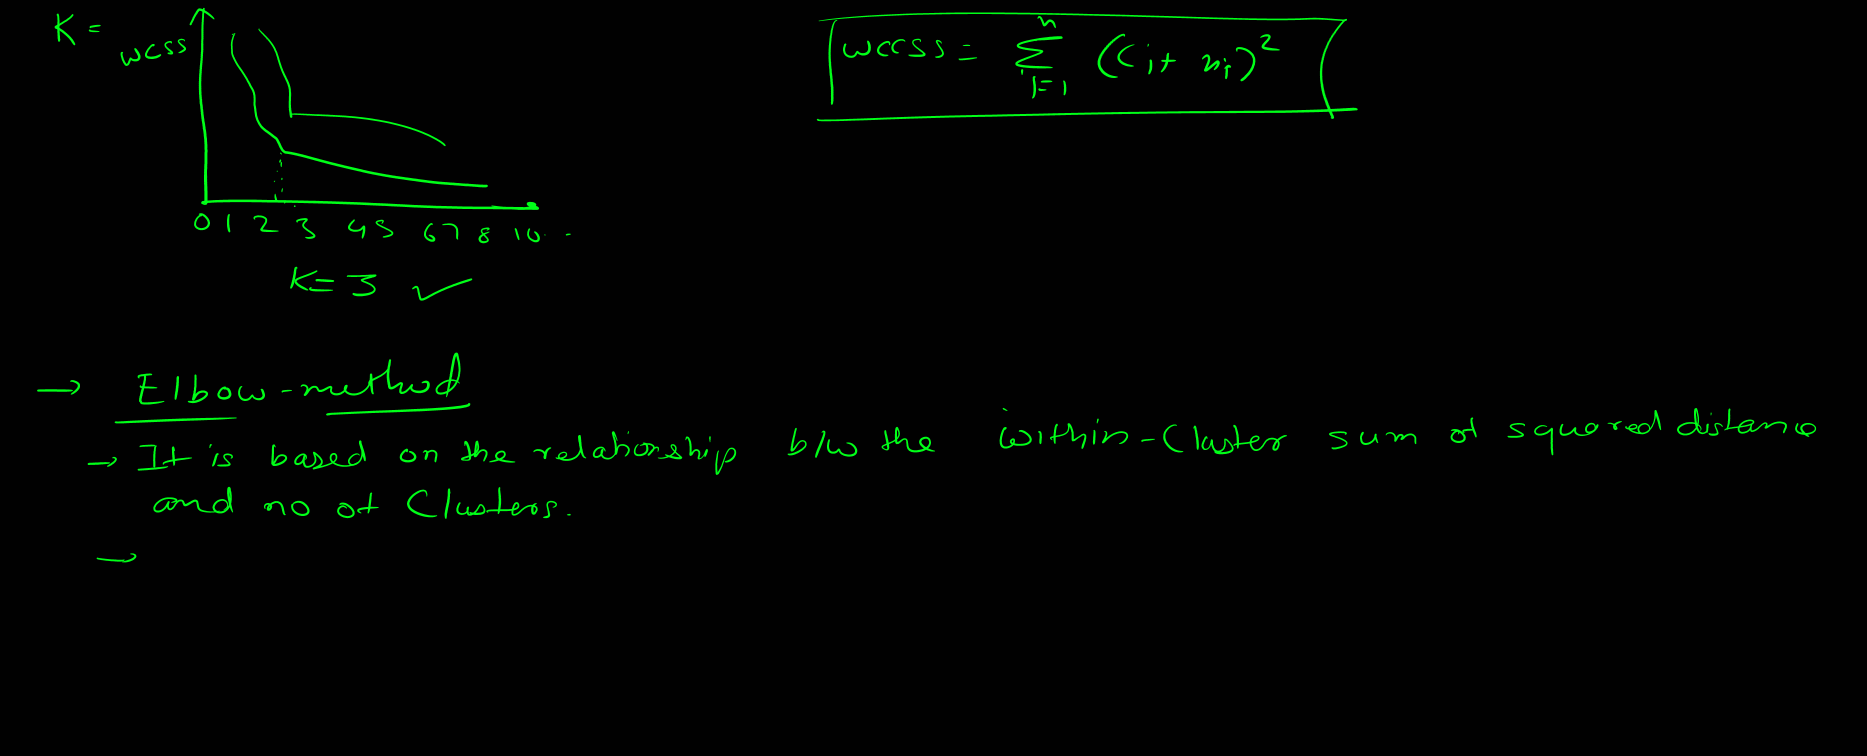

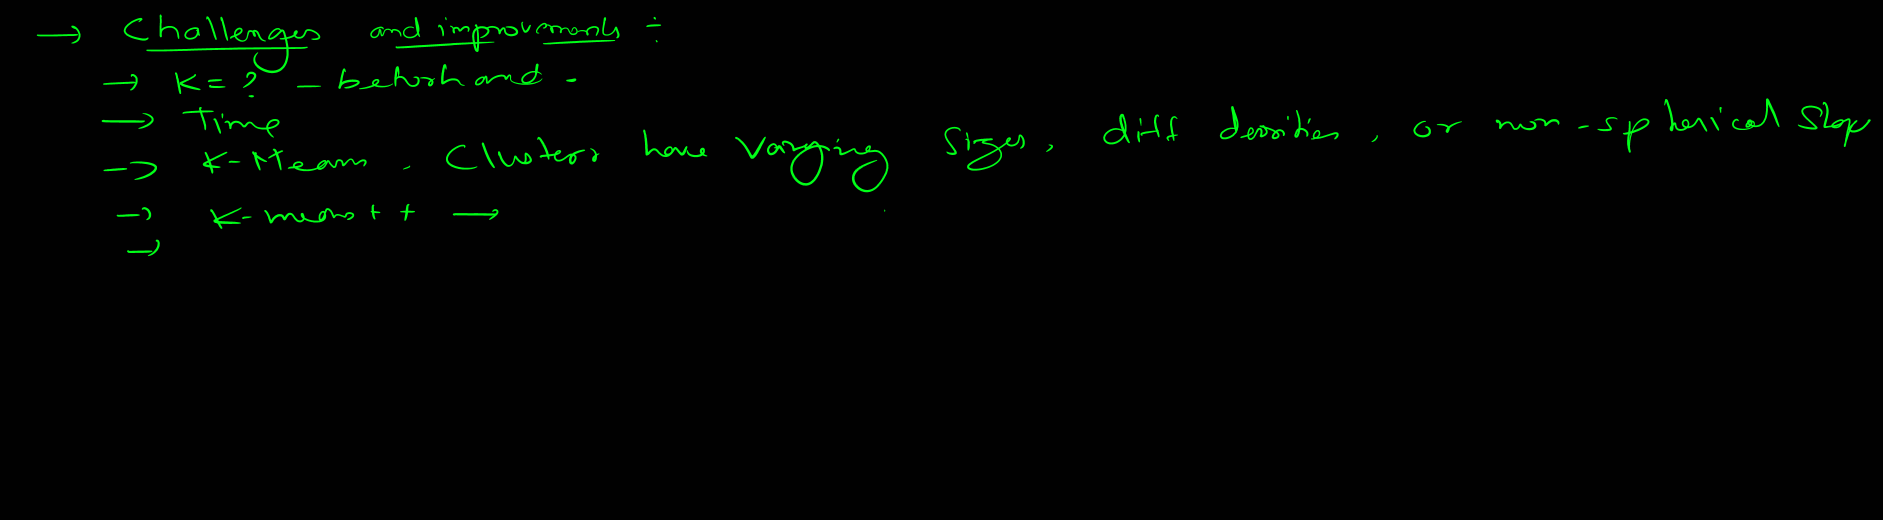

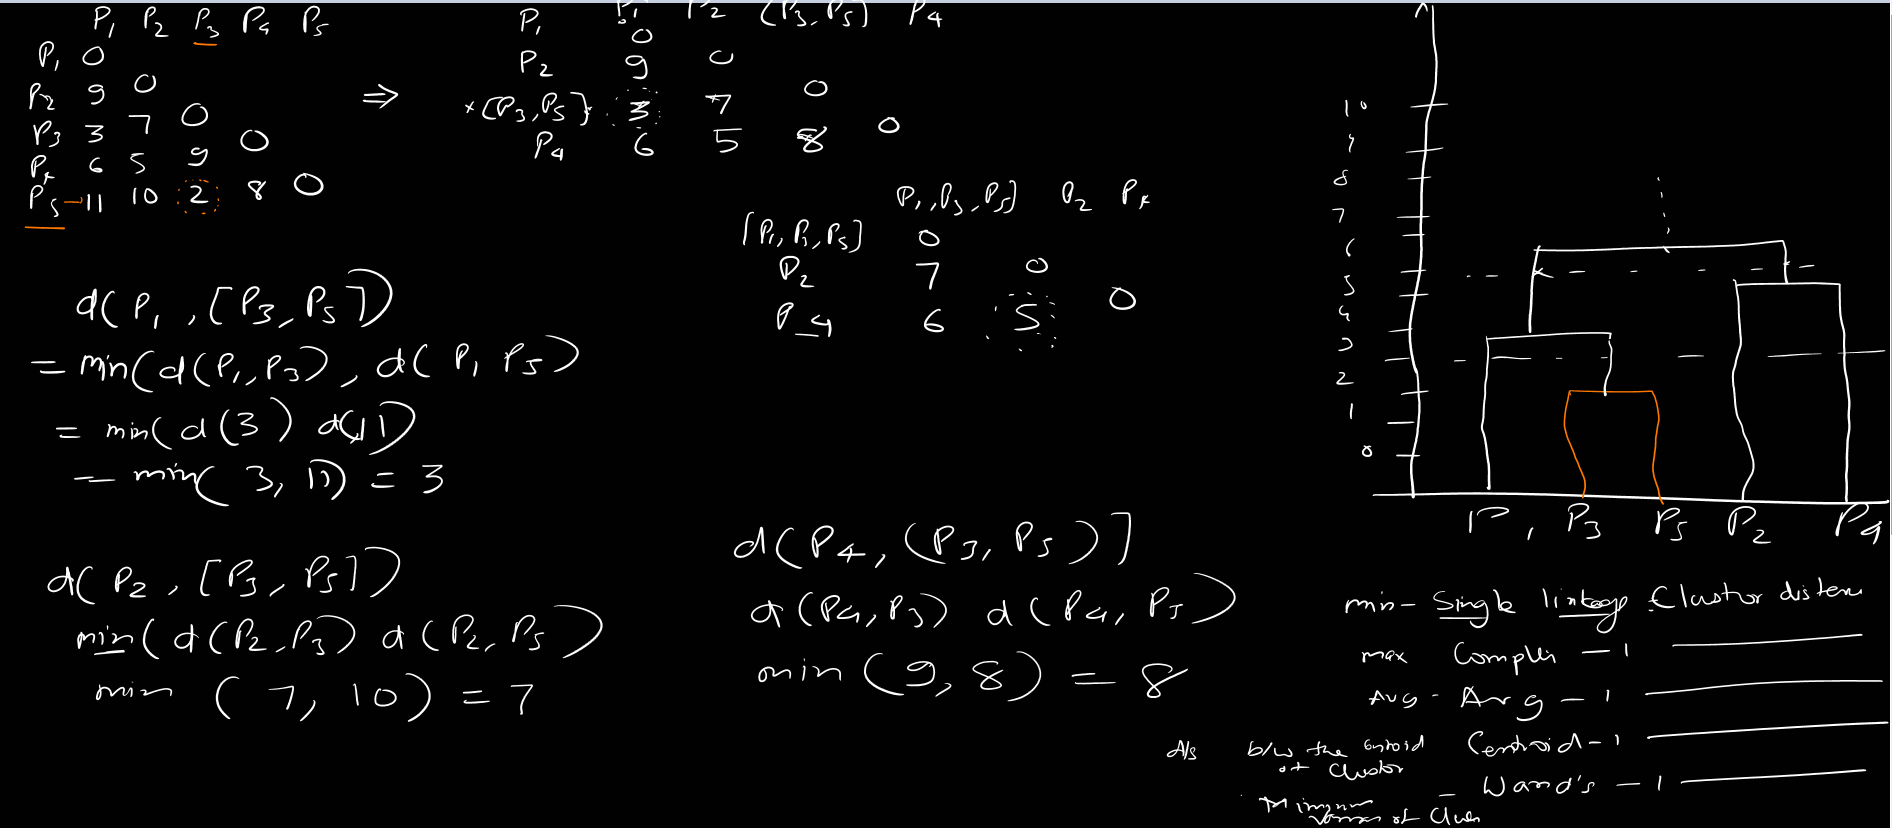

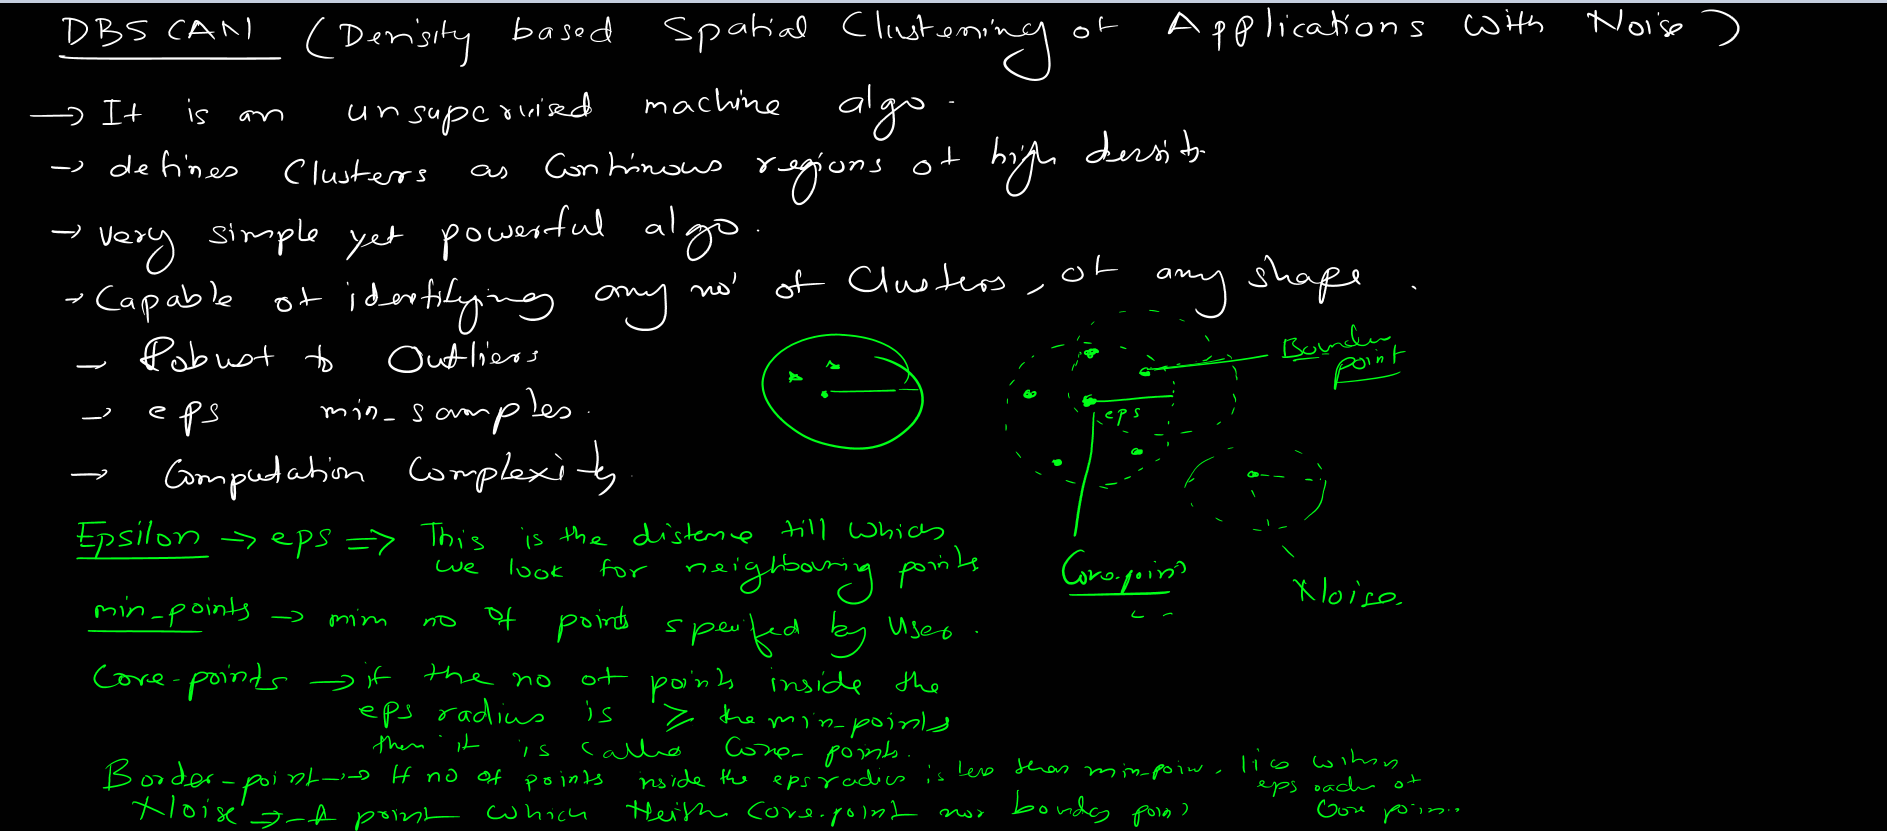

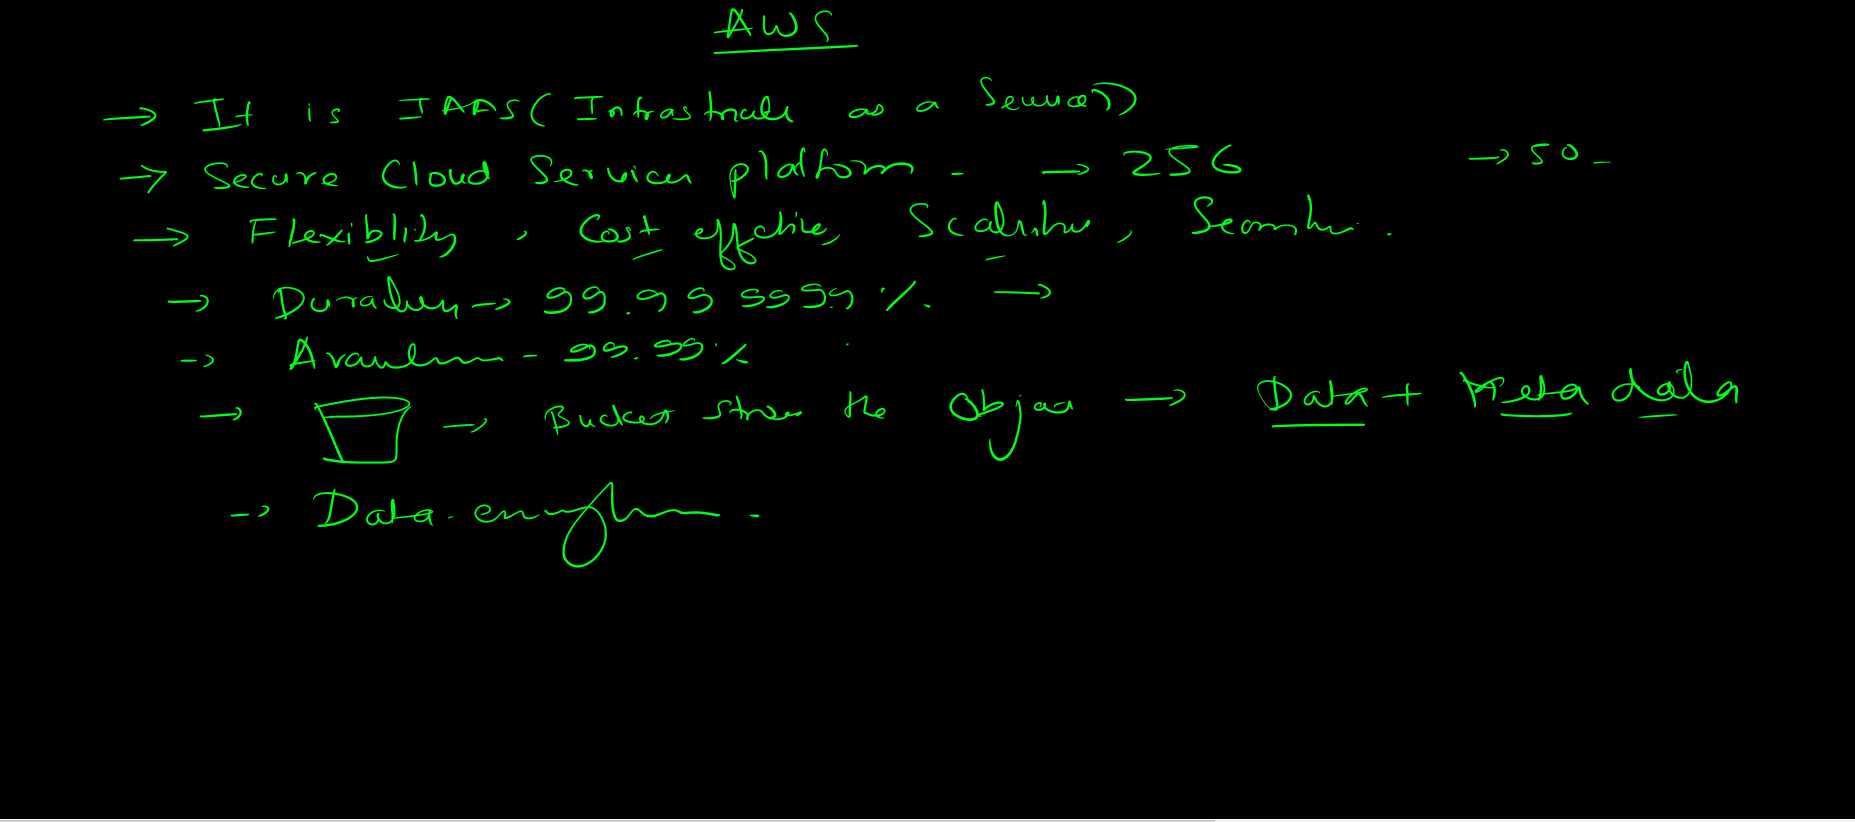

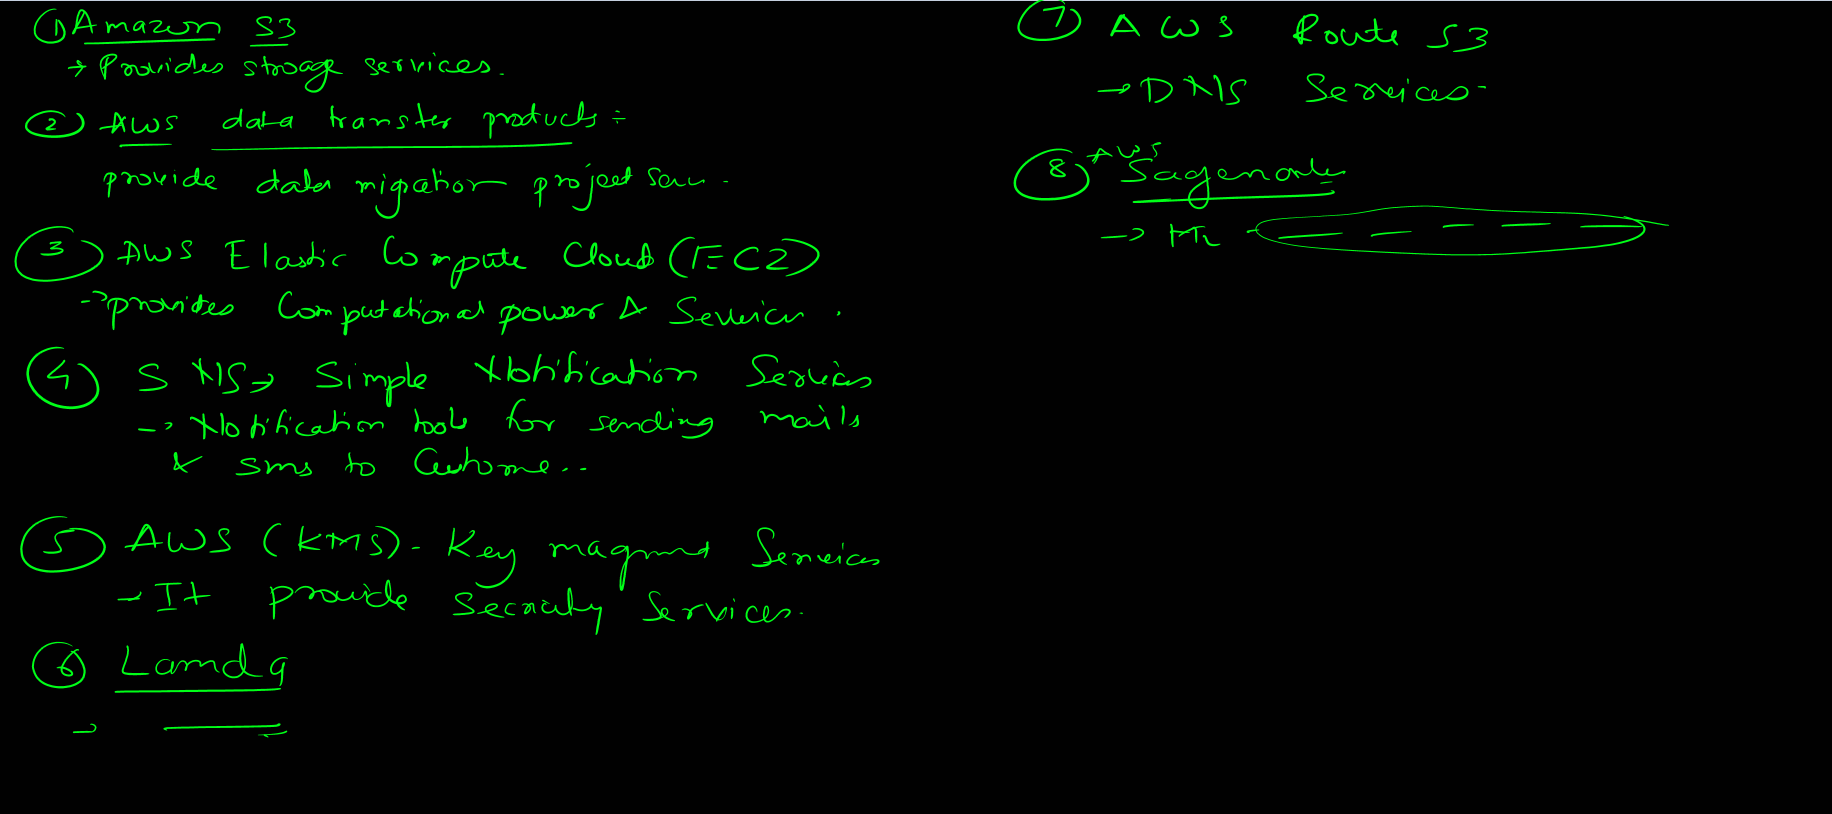

In [2]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

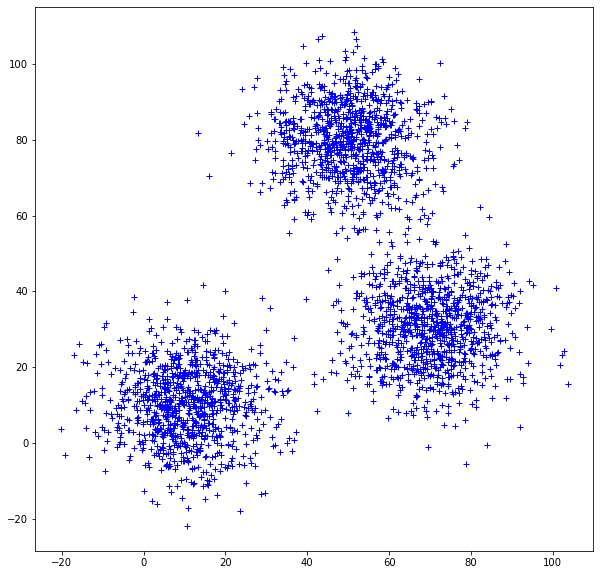

In [3]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

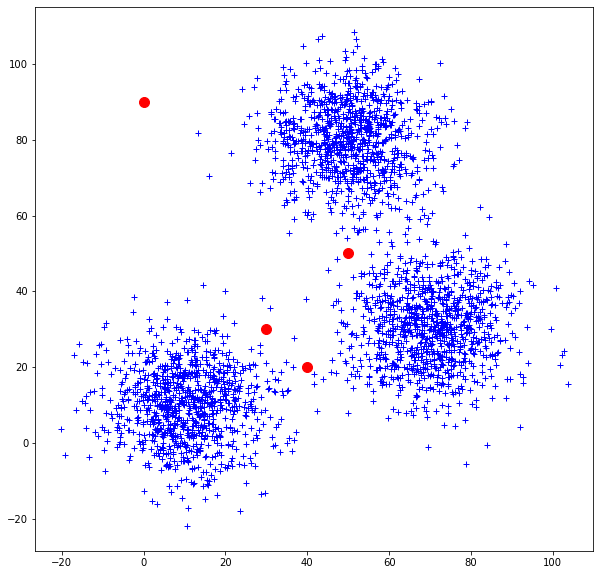

In [4]:

protos = array([[30,30],[40,20],[0,90],[50,50]]) # Initialize centroids
start = protos.copy()

figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

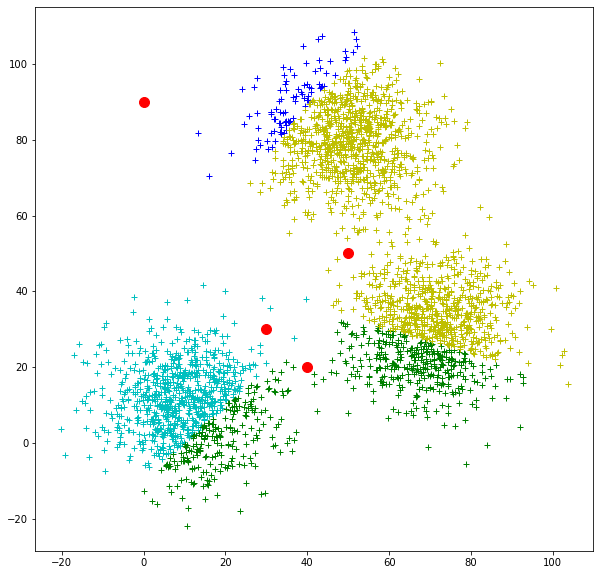

In [5]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [6]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

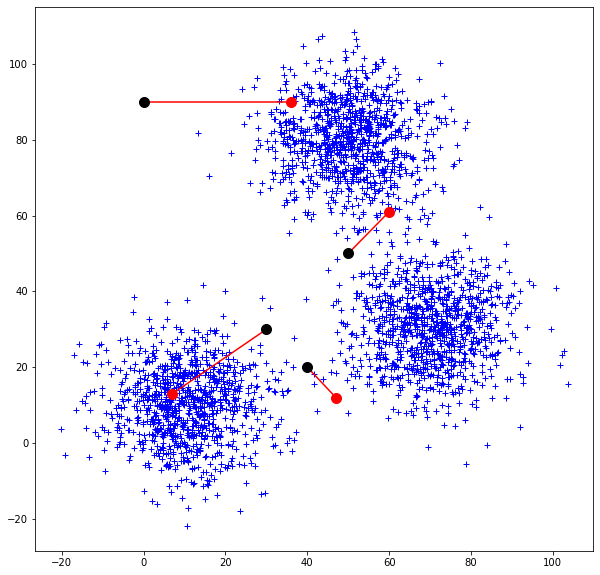

In [7]:
# Plotting the centroid movements
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [8]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

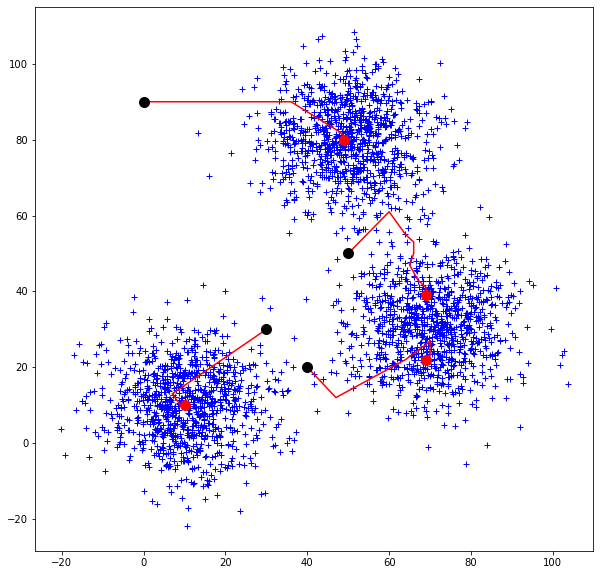

In [9]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

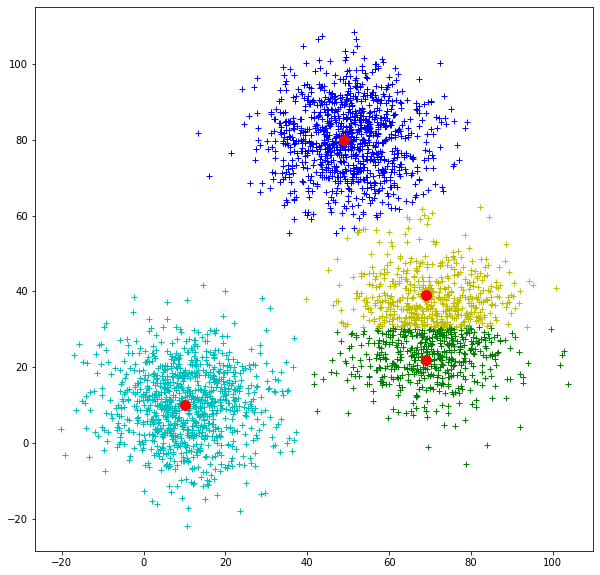

In [10]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
dataset=pd.read_csv('Mall_Customers.csv')

In [ ]:
dataset

In [ ]:
#dataset
X=dataset.iloc[:,3:]
X

In [ ]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

In [ ]:
# Looking at the points which belong to Cluster0
X[y_kmeans==0]

In [ ]:
# Looking at the points which belong to Cluster0
X[y_kmeans==1]

In [ ]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# DBSCAN Clustering

# Importing the libraries
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

# Fitting the model

model=dbscan.fit(X)

labels=model.labels_


# from sklearn import metrics

# #identifying the points which makes up our core points
# sample_cores=np.zeros_like(labels,dtype=bool)

# sample_cores[dbscan.core_sample_indices_]=True

In [ ]:
labels

# DBSCAN(Density Based Spatial Clustering of Apllications with Noise)



It is an unsupervised machine learning algorithm.This algorithm defines clusters as continuous regions of high density.

Some definitions first:

**Epsilon:** This is also called eps. This is the distance till which we look for the neighbouring points.

**Min_points:** The minimum number of points specified by the user.

**Core Points:** If the number of points inside the _eps radius_ of a point is greater than or equal to the *min_points* then it’s called a core point.

**Border Points:** If the number of points inside the _eps radius_ of a point is less than the *min_points* and it lies within the _eps radius_ region of a core point, it’s called a border point.

**Noise:** A point which is neither a core nor a border point is a noise point.

Algorithm Steps:

1.	The algorithm starts with a random point in the dataset which has not been visited yet and its neighbouring points are identified based on the eps value.
2.	If the point contains greater than or equal points than the min_pts, then the cluster formation starts and this point becomes a _core point_, else it’s considered as noise. The thing to note here is that a point initially classified as noise can later become a border point if it’s in the eps radius of a core point.
3.	If the point is a core point, then all its neighbours become a part of the cluster. If the points in the neighbourhood turn out to be core points then their neighbours are also part of the cluster.
4.	Repeat the steps above until all points are  classified into different clusters or noises.



This algorithm works well if all the clusters are dense enough, and they are well separated by low-density regions.

# Hierarchical clustering

**The Algorithm:**

1.	Begin with n observations and a measure (such as Euclidean distance) of all the n(n−1)/2 pairwise dissimilarities(or the Euclidean distances generally). Treat each observation as its own cluster. Initially, we have n clusters.
2.	Compare all the distances and put the two closest points/clusters in the same cluster. The dissimilarity(or the Euclidean distances) between these two clusters indicates the height in the dendrogram at which the fusion line should be placed.
3.	Compute the new pairwise inter-cluster dissimilarities(or the Euclidean distances) among the remaining clusters.
4.	Repeat steps 2 and 3 till we have only one cluster left.